# R04 Ví dụ: Điểm thi tốt nghiệp cấp 3

## Mục đích

Ứng dụng RegEx và Pandas vào trong một ví dụ thực tế.


## Bài toán

Trong file `diemthi.csv` mà bạn sẽ tìm thấy trong folder này, chúng ta có điểm thi của một số học sinh cấp 3 ở Hà Nội trong một kì thi tốt nghiệp cách đây vài năm. Hãy cùng khám phá bộ số liệu này.

In [1]:
import pandas as pd

d = pd.read_csv("diemthi.csv")
d

,name,dob,id,result
0,ĐỖ MINH HIẾU,16/03/1999,1060058,Toán: 3.60 Ngữ văn: 5.75 Vật lí: 2.5...
1,NGUYỄN VĂN HIỀN,23/10/1999,1038086,Toán: 5.00 Ngữ văn: 7.50 Lịch sử: 4....
2,NGUYỄN THU TRANG,07/05/1999,1064365,Toán: 7.40 Ngữ văn: 8.50 Lịch sử: 4....
3,DOÃN THỊ THUÝ NGÂN,05/07/1999,1041462,Toán: 4.40 Ngữ văn: 7.00 Vật lí: 4.2...
4,LÃ THÚY HẰNG,28/02/1999,1021203,Toán: 4.00 Ngữ văn: 8.00 Vật lí: 2.7...
...,...,...,...,...
5516,ĐẶNG VĂN QUANG,02/02/1999,1044171,Toán: 6.00 Ngữ văn: 6.25 Vật lí: 3.0...
5517,NGUYỄN THỊ NGỌC ANH,12/11/1999,1036513,Toán: 8.60 Ngữ văn: 6.50 Vật lí: 8.5...
5518,LÊ TIẾN ĐẠT,09/09/1999,1019698,Toán: 8.00 Ngữ văn: 7.00 Vật lí: 5.2...
5519,TRẦN THỊ MỸ LINH,13/01/1999,1040727,Toán: 4.80 Ngữ văn: 7.50 Lịch sử: 4....


Chúng ta thấy rằng kết quả của các bài thi của mỗi học sinh bị "dính" vào với nhau trong cột `result`. Điều này sẽ khiến chúng ta gặp khó khăn trong việc phân tích kết quả thi của toàn bộ các học sinh. Hãy cùng xem kĩ hơn một chuỗi kí tự điểm thi để hiểu rõ pattern của nó.

In [2]:
d.loc[0, "result"]

'Toán:   3.60   Ngữ văn:   5.75   Vật lí:   2.50   Hóa học:   3.50   Sinh học:   2.50   KHTN: 2.83   Tiếng Anh:   2.20   '

Như vậy, các kết quả thi đều bắt đầu bằng tên môn học với một chữ cái viết hoa, sau đó là dấu hai chấm `:`, và điểm thi là các số thập phân làm tròn tới 2 chữ số sau dấu phẩy. Có một vấn đề bé tí xíu với tên môn học, đó là môn Địa lí thì chữ cái đầu sẽ là `Đ`, không phải một kí tự từ A đến Z. Bạn cần lưu tâm điểm này khi thiết kế chuỗi RegEx.

Bây giờ chúng ta sẽ xây dựng chuỗi RegEx và tách các điểm này ra bằng `.str.extractall()` trong Pandas.

In [3]:
pat = r"(?P<subject>[A-ZĐ][^:]*):\s*(?P<score>\d{1,2}\.\d{2})"

d["result"].str.extractall(pat)

subject score
     match                 
0    0           Toán  3.60
     1        Ngữ văn  5.75
     2         Vật lí  2.50
     3        Hóa học  3.50
     4       Sinh học  2.50
...               ...   ...
5520 2        Lịch sử  4.25
     3         Địa lí  6.75
     4           GDCD  7.25
     5           KHXH  6.08
     6      Tiếng Anh  8.20

[38138 rows x 2 columns]

Bạn có thể thấy chúng ta đã rất nhanh chóng tách ra được hai cột tên môn thi và điểm thi. Tiếp theo, chúng ta sẽ chuyển giá trị trong cột `score` về dạng số, và gộp dữ liệu này vào với tên học sinh. Việc gộp dữ liệu vào với tên học sinh là hoàn toàn không cần thiết để thống kê, nhưng chúng ta sẽ làm việc đó để ôn tập lại Pandas.

In [4]:
d_score = d["result"].str.extractall(pat)
d_score["subject"] = pd.Categorical(d_score["subject"])
d_score["score"] = pd.to_numeric(d_score["score"])
d_score = d_score.droplevel("match", axis="index")
d_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38138 entries, 0 to 5520
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   subject  38138 non-null  category
 1   score    38138 non-null  float64 
dtypes: category(1), float64(1)
memory usage: 633.8 KB


In [5]:
d_score.head()

,subject,score
0,Toán,3.60
0,Ngữ văn,5.75
0,Vật lí,2.50
0,Hóa học,3.50
0,Sinh học,2.50


In [6]:
d.join(d_score)

,name,dob,id,result,subject,score
0,ĐỖ MINH HIẾU,16/03/1999,1060058,Toán: 3.60 Ngữ văn: 5.75 Vật lí: 2.5...,Toán,3.60
0,ĐỖ MINH HIẾU,16/03/1999,1060058,Toán: 3.60 Ngữ văn: 5.75 Vật lí: 2.5...,Ngữ văn,5.75
0,ĐỖ MINH HIẾU,16/03/1999,1060058,Toán: 3.60 Ngữ văn: 5.75 Vật lí: 2.5...,Vật lí,2.50
0,ĐỖ MINH HIẾU,16/03/1999,1060058,Toán: 3.60 Ngữ văn: 5.75 Vật lí: 2.5...,Hóa học,3.50
0,ĐỖ MINH HIẾU,16/03/1999,1060058,Toán: 3.60 Ngữ văn: 5.75 Vật lí: 2.5...,Sinh học,2.50
...,...,...,...,...,...,...
5520,NGÔ BẢO TRÂM,19/07/1999,1012777,Toán: 5.80 Ngữ văn: 9.25 Lịch sử: 4....,Lịch sử,4.25
5520,NGÔ BẢO TRÂM,19/07/1999,1012777,Toán: 5.80 Ngữ văn: 9.25 Lịch sử: 4....,Địa lí,6.75
5520,NGÔ BẢO TRÂM,19/07/1999,1012777,Toán: 5.80 Ngữ văn: 9.25 Lịch sử: 4....,GDCD,7.25
5520,NGÔ BẢO TRÂM,19/07/1999,1012777,Toán: 5.80 Ngữ văn: 9.25 Lịch sử: 4....,KHXH,6.08


Nếu bạn muốn hiển thị số liệu dạng wide thay vì dạng long, chúng ta sẽ pivot số liệu trước khi join.

In [7]:
d_score.pivot(columns="subject", values="score")

subject,GDCD,Hóa học,KHTN,KHXH,Lịch sử,Ngữ văn,Sinh học,Tiếng Anh,Tiếng Nhật,Tiếng Pháp,Tiếng Trung,Tiếng Đức,Toán,Vật lí,Địa lí
0,NaN,3.50,2.83,NaN,NaN,5.75,2.50,2.2,NaN,NaN,NaN,NaN,3.6,2.50,NaN
1,8.50,NaN,NaN,6.58,4.50,7.50,NaN,3.4,NaN,NaN,NaN,NaN,5.0,NaN,6.75
2,7.75,NaN,NaN,5.33,4.00,8.50,NaN,5.8,NaN,NaN,NaN,NaN,7.4,NaN,4.25
3,8.50,4.75,NaN,7.08,5.00,7.00,4.50,3.8,NaN,NaN,NaN,NaN,4.4,4.25,7.75
4,NaN,2.50,2.25,NaN,NaN,8.00,1.50,3.4,NaN,NaN,NaN,NaN,4.0,2.75,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5516,6.75,4.25,NaN,5.75,5.25,6.25,3.25,2.4,NaN,NaN,NaN,NaN,6.0,3.00,5.25
5517,NaN,8.50,7.58,NaN,NaN,6.50,5.75,5.2,NaN,NaN,NaN,NaN,8.6,8.50,NaN
5518,NaN,4.00,NaN,NaN,NaN,7.00,4.25,9.4,NaN,NaN,NaN,NaN,8.0,5.25,NaN
5519,7.75,NaN,NaN,5.92,4.50,7.50,NaN,2.8,NaN,NaN,NaN,NaN,4.8,NaN,5.50


In [8]:
d.join(d_score.pivot(columns="subject", values="score")).head()

,name,dob,id,result,GDCD,Hóa học,KHTN,KHXH,Lịch sử,Ngữ văn,Sinh học,Tiếng Anh,Tiếng Nhật,Tiếng Pháp,Tiếng Trung,Tiếng Đức,Toán,Vật lí,Địa lí
0,ĐỖ MINH HIẾU,16/03/1999,1060058,Toán: 3.60 Ngữ văn: 5.75 Vật lí: 2.5...,NaN,3.50,2.83,NaN,NaN,5.75,2.5,2.2,NaN,NaN,NaN,NaN,3.6,2.50,NaN
1,NGUYỄN VĂN HIỀN,23/10/1999,1038086,Toán: 5.00 Ngữ văn: 7.50 Lịch sử: 4....,8.50,NaN,NaN,6.58,4.5,7.50,NaN,3.4,NaN,NaN,NaN,NaN,5.0,NaN,6.75
2,NGUYỄN THU TRANG,07/05/1999,1064365,Toán: 7.40 Ngữ văn: 8.50 Lịch sử: 4....,7.75,NaN,NaN,5.33,4.0,8.50,NaN,5.8,NaN,NaN,NaN,NaN,7.4,NaN,4.25
3,DOÃN THỊ THUÝ NGÂN,05/07/1999,1041462,Toán: 4.40 Ngữ văn: 7.00 Vật lí: 4.2...,8.50,4.75,NaN,7.08,5.0,7.00,4.5,3.8,NaN,NaN,NaN,NaN,4.4,4.25,7.75
4,LÃ THÚY HẰNG,28/02/1999,1021203,Toán: 4.00 Ngữ văn: 8.00 Vật lí: 2.7...,NaN,2.50,2.25,NaN,NaN,8.00,1.5,3.4,NaN,NaN,NaN,NaN,4.0,2.75,NaN


## Phân tích số liệu

### Thống kê mô tả

Chúng ta có thể mô tả phân bố điểm thi thông qua trung bình, trung vị, khoảng tứ phân vị, v.v.. Để cho đơn giản, hãy dùng hàm `describe()` trong Pandas.

In [9]:
d_score.groupby("subject")["score"].describe()

,count,mean,std,min,25%,50%,75%,max
subject,,,,,,,,
GDCD,3074.0,7.607759,0.984090,2.25,7.00,7.75,8.25,10.00
Hóa học,2596.0,5.155720,2.141253,0.75,3.25,4.75,6.75,10.00
KHTN,2070.0,4.987754,1.455585,1.58,3.83,4.92,6.08,9.17
KHXH,2584.0,6.100050,1.049860,2.17,5.33,6.08,6.75,9.67
Lịch sử,3580.0,4.367388,1.515645,0.75,3.25,4.25,5.25,9.75
Ngữ văn,5346.0,6.108199,1.516089,1.00,5.00,6.25,7.25,9.50
Sinh học,2480.0,4.425000,1.439190,1.00,3.50,4.25,5.00,10.00
Tiếng Anh,4820.0,5.017178,2.281334,0.80,3.20,4.40,6.60,10.00
Tiếng Nhật,13.0,7.200000,2.278889,2.60,5.80,8.40,9.00,9.40


### Vẽ biểu đồ

Nhá hàng một chút những gì thư viện `matplotlib` và `seaborn` có thể làm cho bạn. Chúng ta sẽ vẽ một loạt các biểu đồ histogram + KDE cho các môn thi có trên 100 học sinh. Chúng ta sẽ dùng hàm `groupby` và `transform()` để lọc ra các môn thi không đủ điều kiện này.

Ngoài ra, trong đoạn lệnh dưới đây, bạn sẽ chú ý thấy mình vẽ phân bố điểm thi của mỗi môn thi vào một hệ trục tọa độ (axes), và các hệ trục tọa độ được đánh số từ 0 trở đi. Để có thể đánh số được cho các môn thi, mình dùng hàm `enumerate()`.

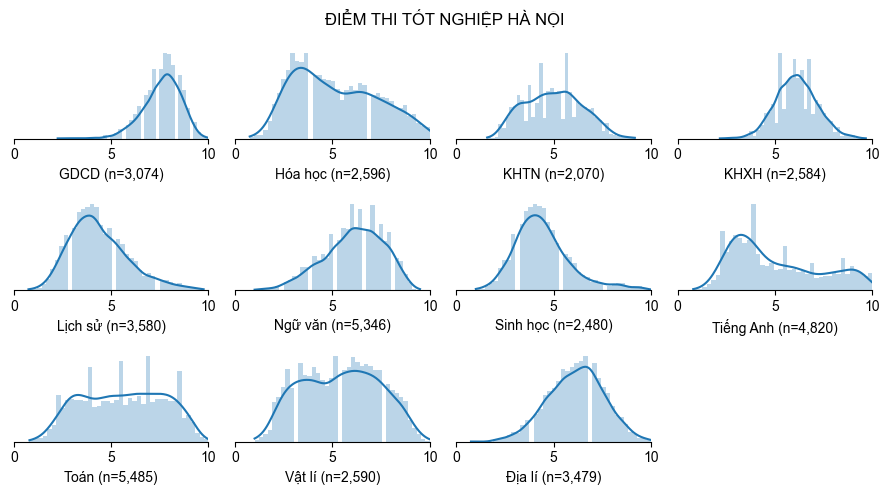

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loại bỏ các môn thi có <=100 học sinh
d_score_plot = d_score \
    .assign(
        n_stud_gt100 = d_score.groupby("subject")["score"].transform(lambda x: x.count() > 100)
    ) \
    .query("n_stud_gt100") \
    .assign(
        subject = lambda x: x["subject"].cat.remove_unused_categories()
    )

n_subjects = len(d_score_plot["subject"].unique())
nrow = int(np.sqrt(n_subjects))
ncol = n_subjects // nrow + (n_subjects % nrow > 0)

# Vẽ KDE
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "Arial"

hist_kws = {
    "ec": "none",
    "alpha": 0.3,
}

grpby = d_score_plot.groupby("subject")
fig, axs = plt.subplots(nrow, ncol, figsize=(9, 5), tight_layout=True)

for i, group in enumerate(grpby.groups):
    row = i // ncol
    col = i % ncol
    ax = axs[row, col]

    data = grpby.get_group(group)
    sns.histplot(data["score"], bins=40, kde=True, ax=ax, **hist_kws)

    ax_settings = {
        "xlabel": f"{group} (n={data.shape[0]:,})",
        "ylabel": "",
        "xlim": (0, 10),
        "xticks": [0, 5, 10],
        "yticks": [],
    }

    ax.set(**ax_settings)

    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)

for i in range(n_subjects, nrow * ncol):
    row = i // ncol
    col = i % ncol
    ax = axs[row, col]
    ax.set_axis_off()

fig.suptitle("ĐIỂM THI TỐT NGHIỆP HÀ NỘI")

plt.show()

---

[Bài trước](./03_examples.ipynb) - [Danh sách bài](../README.md) - [Bài sau]()